## Sentiment Analysis using Vader

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
analyser = SentimentIntensityAnalyzer()



In [32]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score.get('compound')

In [14]:
df = pd.read_pickle('data_clean.pkl')

In [15]:
df1= pd.read_pickle('date_rating_review_PurpleKow.pickle')

In [16]:
df1.sample(10)

,Date,Star_Rating,Review
649,6/13/2013,3,I don't know what's all involved in making a m...
1570,7/27/2014,3,I took a sip and it was heavenly. I took a few...
2096,3/23/2012,1,People in sf stop coming here the line is long...
296,1/4/2016,4,PurpleKow is amazing. I've been here twice and...
160,3/8/2017,3,For those who don't like super sweet drinks......
743,3/19/2016,5,I truly cannot fight over purple kow's milk te...
1213,4/23/2013,2,This place is weird. On an early Friday evenin...
1144,7/31/2013,3,The only drink I like here is that Creamy Frui...
1587,3/1/2012,3,What is up with this ridiculously long line?! ...
1838,2/12/2014,5,Seriously when I crave boba I crave purple kow...


In [33]:
sentiment= lambda x: sentiment_analyzer_scores(x)
df1['Sentiment'] = df1.Review.apply(sentiment);

In [34]:
df1.head()

,Date,Star_Rating,Review,Sentiment
0,10/17/2019,5,This place has been around for years! I rememb...,0.8908
1,2/4/2020,3,This place is just okay. The layout of the sho...,0.8891
2,1/28/2020,3,I went here for the first time and got a D3 (c...,0.9505
3,1/1/2020,1,Okay in another world I would be giving a 5 st...,0.9731
4,2/24/2020,5,I loved their passion fruit green tea with coc...,0.8983


In [63]:
compound = sentiment_analyzer_scores(df1.iloc[1,2])
compound

0.8891

In [37]:
def sentiment(num):
    if num > 0:
        tag = 'Positive'
    elif num == 0:
        tag = 'Neutral'
    else:
        tag = 'Negative'
    return tag

In [38]:
sentiment_convert= lambda x: sentiment(x)

In [39]:
df1['S'] = df1.Sentiment.apply(sentiment_convert);

In [44]:
df1.head()

,Date,Star_Rating,Review,Sentiment,S
0,10/17/2019,5,This place has been around for years! I rememb...,0.8908,Positive
1,2/4/2020,3,This place is just okay. The layout of the sho...,0.8891,Positive
2,1/28/2020,3,I went here for the first time and got a D3 (c...,0.9505,Positive
3,1/1/2020,1,Okay in another world I would be giving a 5 st...,0.9731,Positive
4,2/24/2020,5,I loved their passion fruit green tea with coc...,0.8983,Positive


In [45]:
topic_df = pd.read_pickle('topic_data.pkl')

In [47]:
df1['DominantTopic'] = topic_df['Dominant_Topic']

In [48]:
df1.head()

,Date,Star_Rating,Review,Sentiment,S,DominantTopic
0,10/17/2019,5,This place has been around for years! I rememb...,0.8908,Positive,WaitTime
1,2/4/2020,3,This place is just okay. The layout of the sho...,0.8891,Positive,WaitTime
2,1/28/2020,3,I went here for the first time and got a D3 (c...,0.9505,Positive,IcedMilk
3,1/1/2020,1,Okay in another world I would be giving a 5 st...,0.9731,Positive,IcedMilk
4,2/24/2020,5,I loved their passion fruit green tea with coc...,0.8983,Positive,Tea


In [53]:
topic_sentiment_count = pd.DataFrame(df1.groupby('DominantTopic')['S'].value_counts())

In [55]:
topic_sentiment_count.rename(columns={'S':'count'},inplace=True)

In [56]:
topic_sentiment_count.reset_index(inplace=True)

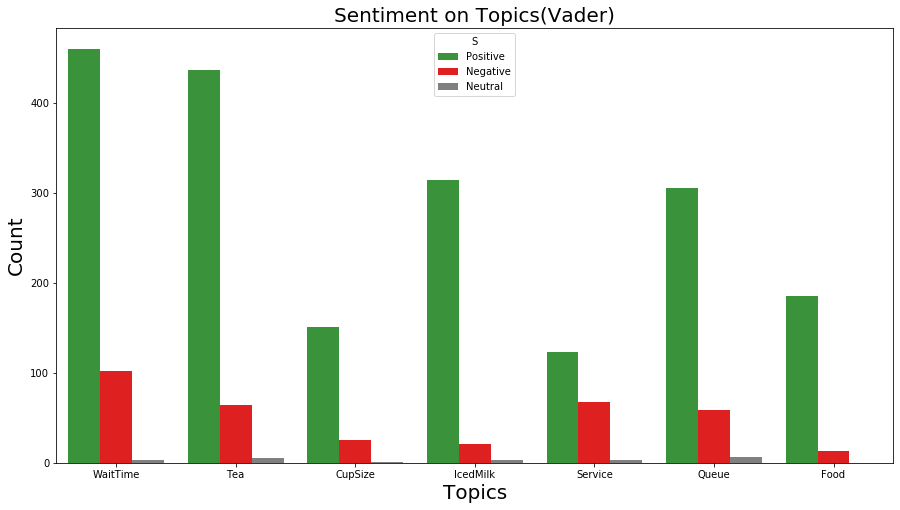

In [61]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#bar plot for sentiment on each topic
plt.figure(figsize=(15,8))
sns.barplot(x='DominantTopic', y='count', hue='S', data=topic_sentiment_count,palette=['C2', "Red", "Gray"],
           order = topic_sentiment_count['DominantTopic'].value_counts().index)

plt.xlabel('Topics', size=20)
plt.ylabel('Count', size = 20)
plt.title('Sentiment on Topics(Vader)', size = 20)
plt.savefig('topic_sentiment_vader.jpg')
plt.show()

## Sentiment analysis on yelp reviews using Vader is not the most accurate one.  There are way more positive sentiment reviews than the star rating indicates.  Aspect based sentiment will be the better method to analyze the sentiment of the reviews.  